In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import svm
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

C:\Users\Álvaro\anaconda3.1\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv(r"C:\Users\Álvaro\Final-project\Data\data.csv")

In [3]:
df

,eventTime_ay,Date,email,firstName,lastName,Sub_Categoria,campaign,medium,userId,source,...,time_diff_ay_ac,time_diff_ac_vg,time_diff_vg_ff,time_diff_ff_fd,time_diff_fd_pm,city,cityId,region,regionId,sessions
0,2020-05-09 10:19:12,2020-05-09,eduardoperez@seincomobiliario.com,EDUARDO,PEREZ,disenador-de-muebles,NaN,NaN,083e8b2f-af6a-46b4-a9b9-4f79c1a32cf1,NaN,...,NaN,NaN,0 days 00:00:03,NaN,NaN,Barcelona,1005424,Catalonia,20278,2.0
1,2020-04-12 14:50:10,2020-04-12,alexvonder@hotmail.com,Alexandra,Perez,chofer,01_España_Genéricas,ppc,0feedfe0-5452-434c-8a70-845fa3fd638a,adwords,...,NaN,NaN,0 days 00:00:02,NaN,NaN,(not set),(not set),Balearic Islands,21387,6.0
2,2020-11-08 18:09:23,2020-11-08,Evo@gmail.com,Juanjo,Akze,fotoperiodista,10430315940,cpc,18bb05eb-d592-4459-a682-f622afb7208c,adwords,...,NaN,NaN,NaN,NaN,NaN,Mollet del Valles,1005431,Catalonia,20278,2.0
3,2020-08-25 15:18:38,2020-08-25,cesardelacalle@grupoccs.es,cesar fernando,de la calle verde,conserje,10430285424,cpc,328d85a1-28b3-493d-ad17-ab58e4567357,adwords,...,NaN,NaN,NaN,NaN,NaN,Villanueva de la Canada,9049240,Madrid,9047045,1.0
4,2020-11-16 11:02:42,2020-11-16,brsbrs02@gmail.com,Bruno,RS,proyectista,10430285424,cpc,39d91a35-e406-462d-a7a5-7b2291ba8340,adwords,...,NaN,NaN,NaN,NaN,NaN,A Coruna,1005479,Galicia,20280,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,2020-07-05 11:44:34,2020-07-05,kk@hotmail.com,Santi,Mirlo,entrenador-o-monitor-deportivo,NaN,NaN,7a6ca821-1e99-4156-bb35-9d904828b26b,NaN,...,NaN,NaN,0 days 00:00:03,NaN,NaN,Castellon de la Plana,1005539,Valencian Community,21388,1.0
8058,2020-08-29 08:45:46,2020-08-29,sarah@slyne.com,Sarah,Slyne,entrenador-o-monitor-deportivo,NaN,NaN,ab772667-56c1-4e2a-b938-ae6e4e3980e3,NaN,...,NaN,NaN,NaN,NaN,NaN,Seville,1005421,Andalusia,20269,2.0
8059,2020-06-04 09:03:30,2020-06-04,saraculebras@gmail.com,Sara,Culebras Yagüe,entrenador-o-monitor-deportivo,NaN,NaN,dc059f05-6e2a-4cb6-9436-826b38d87ce9,NaN,...,NaN,NaN,0 days 00:00:03,NaN,NaN,Torrejon de Ardoz,1005496,Madrid,9047045,1.0
8060,2020-09-30 16:03:25,2020-09-30,blancopris@gmail.com,Priscila,Abbona,entrenador-o-monitor-deportivo,RC_pillarpage_nurturing,email,e2af6a50-4e9e-42c0-a5fc-784141160d31,hs_automation,...,NaN,NaN,0 days 00:00:04,NaN,NaN,Pamplona,1005503,Navarre,9047051,1.0


In [4]:
data = df.sort_values(by = 'Date', ascending = True)

In [5]:
pd.set_option("display.max_columns", 200)
data

,eventTime_ay,Date,email,firstName,lastName,Sub_Categoria,campaign,medium,userId,source,singular_duplicate,test_duplicate,row_numbers,extCode,categorySlug,Comercio,RC,session_count_email,session_count_userId,eventTime_ac,gclid,country,state,town,zipcode,policy_start_date,policy_end_date,floors,goods,surface,inauguration_year,locationRisk,numLocals,shop_postcalcode,refurbishing_year,shop_region,electronic_protections,fire_protections,theft_protections,watchman_protections,Type,eventTime_vg,gross_income,money_invested,furnitureWithEquipment,merchandise,ownership,eventTime_off,monthlypayment1,premiumPrice1,monthlypayment2,premiumPrice2,monthlypayment3,premiumPrice3,provider,eventTime_fd,birthdate,documenttype,offerchosen,billingcycle,eventTime_pm,subcription_id,intent_status,endDate,paymenttype,policynumber,policy_url,policyprice,currentprice,Sales Date,Sub-categoria,Billing Cycle,Policy Number,Policy URL,Current Price,Policy Price,Start Date,Payment Type,Persona,Fecha Anulación,Razon anulación,Aseguradora,Online/offline,Renovado,Precio Renovacion,Tipo de póliza,Unnamed: 86,Match email,Match telefono,Semana,Mes,WP,Dia Lead,quote,sale,Categoria,time_diff_ay_ac,time_diff_ac_vg,time_diff_vg_ff,time_diff_ff_fd,time_diff_fd_pm,city,cityId,region,regionId,sessions
2252,2020-03-19 17:14:56,2020-03-19,vem_desarrollo@gmail.com,Victor Emmanuel,Molinas,oficina,ES - Gen - Seguro Locales / local comercial / ...,ppc,21f03e02-1bf7-4018-99bb-7264cb804540,adwords,False,False,1,oficina,negocio-inmobiliario,1.0,0.0,1,1,2020-03-19 17:19:55,CjwKCAjwsMzzBRACEiwAx4lLG2l7W3bfpsoxCoLlqbM1Fa...,ES,Principado de Asturias,Avilés,33402.0,2020-03-19,2021-03-18,1.0,NaN,70.0,1975.0,URBAN_HUB,1.0,33402.0,NaN,ES-AS,"[""EXTERNAL_ELECTRONIC_PROTECTION""]","[""EXTINGUISHER"",""FIRE_HOSE"",""FIXED_EXTINGUISHE...","[""PADLOCK"",""ARMORED_GLASS""]",[],Comercio,2020-03-19 17:20:54,10000.0,NaN,5000.0,3000.0,TENANT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Negocio inmobiliario,0 days 00:04:59,0 days 00:00:59,NaN,NaN,NaN,(not set),(not set),Balearic Islands,21387,10.0
7648,2020-03-19 18:45:53,2020-03-19,andresaje2206@gmail.com,Carlos André,Farfán,articulos-para-el-hogar,ES - Gen - Seguro Locales / local comercial / ...,ppc,3a6fe8e6-c150-4c79-b89d-4ff56c48e2b1,adwords,False,False,1,articulos-para-el-hogar,muebles-decoracion-y-menaje-hogar,1.0,0.0,1,1,2020-03-19 18:47:35,CjwKCAjwsMzzBRACEiwAx4lLG6xiz0GPrIVYIbLrTj7enS...,ES,Andalucía,Jerez de la Frontera,11403.0,2020-03-19,2021-03-18,2.0,NaN,50.0,1989.0,URBAN_HUB,1.0,11403.0,NaN,ES-AN,[],"[""EXTINGUISHER""]","[""BARS""]",[],Comercio,2020-03-19 18:48:56,50000.0,NaN,5000.0,5000.0,OWNER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Muebles decoracion y menaje hogar,0 days 00:01:42,0 days 00:01:21,NaN,NaN,NaN,El Puerto de Santa Maria,1005445,Andalusia,20269,8.0
6225,2020-03-19 22:57:58,2020-03-19,charrasalahdin24@gmail.com,Salahdin,Chara,bar-cafeteria,ES - Gen - Verticales - Seguros Bares,ppc,1e8fdef7-4c8d-4c2a-8df0-a84d953083ac,adwords,False,False,1,bar-cafeteria,hosteleria-y-restauracion,1.0,0.0,1,1,2020-03-19 23:00:34,NaN,ES,Andalucía,Sevilla,41006.0,2020-03-19,2021-03-18,1.0,NaN,45.0,2017.0,URBAN_HUB,1.0,41006.0,NaN,ES-AN,"[""INTERNAL_ELECTRONIC_PROTECTION""]","[""EXTINGUISHER"",""FIXED_EXTINGUISHER""]","[""PADLOCK"",""ARMORED_GLASS""]",[],Comercio,2020-03-19 23:03:02,3000.0,30000.0,15000.0,6000.0,TENANT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Hosteleria y restauracion,0 days 00:02:36,0 days 00:02:28,NaN,NaN,NaN,Madrid,1005493,Madrid,9047045,1.0
5047,2020-03-19 22:31:09,2020-03-19,munozmichael01@gm

In [6]:
df["region"].replace(' ', '_', regex=True, inplace=True)
df

,eventTime_ay,Date,email,firstName,lastName,Sub_Categoria,campaign,medium,userId,source,singular_duplicate,test_duplicate,row_numbers,extCode,categorySlug,Comercio,RC,session_count_email,session_count_userId,eventTime_ac,gclid,country,state,town,zipcode,policy_start_date,policy_end_date,floors,goods,surface,inauguration_year,locationRisk,numLocals,shop_postcalcode,refurbishing_year,shop_region,electronic_protections,fire_protections,theft_protections,watchman_protections,Type,eventTime_vg,gross_income,money_invested,furnitureWithEquipment,merchandise,ownership,eventTime_off,monthlypayment1,premiumPrice1,monthlypayment2,premiumPrice2,monthlypayment3,premiumPrice3,provider,eventTime_fd,birthdate,documenttype,offerchosen,billingcycle,eventTime_pm,subcription_id,intent_status,endDate,paymenttype,policynumber,policy_url,policyprice,currentprice,Sales Date,Sub-categoria,Billing Cycle,Policy Number,Policy URL,Current Price,Policy Price,Start Date,Payment Type,Persona,Fecha Anulación,Razon anulación,Aseguradora,Online/offline,Renovado,Precio Renovacion,Tipo de póliza,Unnamed: 86,Match email,Match telefono,Semana,Mes,WP,Dia Lead,quote,sale,Categoria,time_diff_ay_ac,time_diff_ac_vg,time_diff_vg_ff,time_diff_ff_fd,time_diff_fd_pm,city,cityId,region,regionId,sessions
0,2020-05-09 10:19:12,2020-05-09,eduardoperez@seincomobiliario.com,EDUARDO,PEREZ,disenador-de-muebles,NaN,NaN,083e8b2f-af6a-46b4-a9b9-4f79c1a32cf1,NaN,False,False,1,disenador-de-muebles,muebles-decoracion-y-menaje-hogar,0.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RC,2020-05-09 10:19:25,30000.0,NaN,NaN,NaN,NaN,2020-05-09 10:19:28,1327.0,15922.0,2212.0,26537.0,2745.0,32938.0,liberty-civilLiability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,Muebles decoracion y menaje hogar,NaN,NaN,0 days 00:00:03,NaN,NaN,Barcelona,1005424,Catalonia,20278,2.0
1,2020-04-12 14:50:10,2020-04-12,alexvonder@hotmail.com,Alexandra,Perez,chofer,01_España_Genéricas,ppc,0feedfe0-5452-434c-8a70-845fa3fd638a,adwords,False,False,1,chofer,servicios-generales,0.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RC,2020-04-12 14:50:22,30000.0,NaN,NaN,NaN,NaN,2020-04-12 14:50:24,1327.0,15922.0,2212.0,26537.0,2745.0,32938.0,liberty-civilLiability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,Servicios generales,NaN,NaN,0 days 00:00:02,NaN,NaN,(not set),(not set),Balearic_Islands,21387,6.0
2,2020-11-08 18:09:23,2020-11-08,Evo@gmail.com,Juanjo,Akze,fotoperiodista,10430315940,cpc,18bb05eb-d592-4459-a682-f622afb7208c,adwords,False,False,1,fotoperiodista,arte-y-entretenimiento,0.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Arte y entretenimiento,NaN,NaN,NaN,NaN,NaN,Mollet del Valles,1005431,Catalonia,20278,2.0
3,2020-08-25 15:18:38,2020-08-25,cesardelacalle@grupoccs.es,cesar fernando,de la calle verde,conserje,10430285424,cpc,328d85a1-28b3-493d-ad17-ab58e4567357,adwords,False,False,1,conserje,servicios-generales,0.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Servicios generales,NaN,NaN,NaN,NaN,NaN,Villanueva de la Canada,9049240,Madrid,9047045,1.0
4,2020-11-16 11:02:42,2020-11-16,brsbrs02@gmail.com,Bruno,RS,proyectista,10430285424,cpc,39d91a35-e406-462d-a7a5-7b2291ba8340,adwords,False,Fal

OVERARCHING GOAL: HOW CAN I HELP SALES PRIORITISE LEADS WHO ARE COMING IN

Different categories:
- RC, Comercio 
- Source
- Geographical information (zipcode) --> loads --> comunidad automona
- Sub-categorias --> 300+ --> 50 by using the sales match (correspondece between extCode - Sales categories)
- Apply k-means using sales data

Continuous variables:
- Join this with INE data -> barcelona average salary is 30000 --> assign this to the lead

OUTPUT:
Binary classification of Sales = 1 or = 0

The idea with incoming leads:
It will sale / good lead
It will not sale / bad lead

In [7]:
df = df[~df['region'].isin(["Ile-de-France","(not_set)","Occitanie","England","Bogota","Bavaria","North_Rhine-Westphalia","Porto_District","Santiago_Metropolitan_Region","Morelos","Melilla","Scotland","Andorra_la_Vella","Zulia","Prague","Lombardy","Hessen","New_York","Capital_District","North_Holland","Occitania","Azuay","Cartago_Province","Utrecht","New_Hampshire","Pays_de_la_Loire","Georgia","Santa_Fe_Province","Buenos_Aires","Rio_Grande","Vienna"])]


In [8]:
df2 = df[[ 'categorySlug', 'region', 'RC', 'Comercio', 'sale']]

In [9]:
df2.dtypes

categorySlug     object
region           object
RC              float64
Comercio        float64
sale              int64
dtype: object

In [10]:
df2.isnull().sum()

categorySlug     98
region          599
RC               98
Comercio         98
sale              0
dtype: int64

In [11]:
df2.shape[0]

7977

In [12]:
df3=df2.dropna()
df3


,categorySlug,region,RC,Comercio,sale
0,muebles-decoracion-y-menaje-hogar,Catalonia,1.0,0.0,0
1,servicios-generales,Balearic_Islands,1.0,0.0,0
2,arte-y-entretenimiento,Catalonia,1.0,0.0,0
3,servicios-generales,Madrid,1.0,0.0,0
4,construccion-y-reformas,Galicia,1.0,0.0,0
...,...,...,...,...,...
8057,deportes-y-ocio,Valencian_Community,1.0,0.0,0
8058,deportes-y-ocio,Andalusia,1.0,0.0,0
8059,deportes-y-ocio,Madrid,1.0,0.0,0
8060,deportes-y-ocio,Navarre,1.0,0.0,0


In [13]:
df3.dtypes

categorySlug     object
region           object
RC              float64
Comercio        float64
sale              int64
dtype: object

In [19]:
def get_dummies(df, varlist):
    for var in varlist:
        df_slice = pd.get_dummies(df[var])
        df = pd.concat([df.drop(var, axis =1), df_slice], axis =1)
    return df

In [20]:
categorical_list = ["categorySlug","region"]
X = df
X = get_dummies(X, categorical_list)
X.isnull().sum()
X


,eventTime_ay,Date,email,firstName,lastName,Sub_Categoria,campaign,medium,userId,source,singular_duplicate,test_duplicate,row_numbers,extCode,Comercio,RC,session_count_email,session_count_userId,eventTime_ac,gclid,country,state,town,zipcode,policy_start_date,policy_end_date,floors,goods,surface,inauguration_year,locationRisk,numLocals,shop_postcalcode,refurbishing_year,shop_region,electronic_protections,fire_protections,theft_protections,watchman_protections,Type,eventTime_vg,gross_income,money_invested,furnitureWithEquipment,merchandise,ownership,eventTime_off,monthlypayment1,premiumPrice1,monthlypayment2,premiumPrice2,monthlypayment3,premiumPrice3,provider,eventTime_fd,birthdate,documenttype,offerchosen,billingcycle,eventTime_pm,subcription_id,intent_status,endDate,paymenttype,policynumber,policy_url,policyprice,currentprice,Sales Date,Sub-categoria,Billing Cycle,Policy Number,Policy URL,Current Price,Policy Price,Start Date,Payment Type,Persona,Fecha Anulación,Razon anulación,Aseguradora,Online/offline,Renovado,Precio Renovacion,Tipo de póliza,Unnamed: 86,Match email,Match telefono,Semana,Mes,WP,Dia Lead,quote,sale,Categoria,time_diff_ay_ac,time_diff_ac_vg,time_diff_vg_ff,time_diff_ff_fd,time_diff_fd_pm,city,cityId,regionId,sessions,alimentacion-y-dietetica,arte-y-entretenimiento,automocion,calzado-marroqueria-y-piel,confecciones-y-textiles,construccion-y-reformas,deportes-y-ocio,educacion,electronica-y-maquinaria,fabricacion,hosteleria-y-restauracion,muebles-decoracion-y-menaje-hogar,negocio-inmobiliario,peluquerias-y-centros-estetica,profesionales-economia,profesionales-oficina,rc-tecnicas-y-profesionales,servicios-generales,servicios-sanitarios,transporte-y-almacenamiento,varios,Andalusia,Aragon,Asturias,Balearic_Islands,Basque_Country,Canary_Islands,Cantabria,Castile-La_Mancha,Castile_and_Leon,Catalonia,Ceuta,Community_of_Madrid,Extremadura,Galicia,La_Rioja,Madrid,Murcia,Navarre,Region_of_Murcia,Valencian_Community
0,2020-05-09 10:19:12,2020-05-09,eduardoperez@seincomobiliario.com,EDUARDO,PEREZ,disenador-de-muebles,NaN,NaN,083e8b2f-af6a-46b4-a9b9-4f79c1a32cf1,NaN,False,False,1,disenador-de-muebles,0.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RC,2020-05-09 10:19:25,30000.0,NaN,NaN,NaN,NaN,2020-05-09 10:19:28,1327.0,15922.0,2212.0,26537.0,2745.0,32938.0,liberty-civilLiability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,Muebles decoracion y menaje hogar,NaN,NaN,0 days 00:00:03,NaN,NaN,Barcelona,1005424,20278,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2020-04-12 14:50:10,2020-04-12,alexvonder@hotmail.com,Alexandra,Perez,chofer,01_España_Genéricas,ppc,0feedfe0-5452-434c-8a70-845fa3fd638a,adwords,False,False,1,chofer,0.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RC,2020-04-12 14:50:22,30000.0,NaN,NaN,NaN,NaN,2020-04-12 14:50:24,1327.0,15922.0,2212.0,26537.0,2745.0,32938.0,liberty-civilLiability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,Servicios generales,NaN,NaN,0 days 00:00:02,NaN,NaN,(not set),(not set),21387,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-11-08 18:09:23,2020-11-08,Evo@gmail.com,Juanjo,Akze,fotoperiodista,10430315940,cpc,18bb05eb-d592-4459-a682-f622afb7208c,adwords,False,False,1,fotoperiodista,0.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Arte y entretenimiento,NaN,NaN,NaN,NaN,NaN,Mollet del Valles,1005431,20278,2.0,0,1,0,0,0,0,0,0,0,0,0

In [21]:
model = RandomForestClassifier()

In [22]:
X.dtypes

eventTime_ay           object
Date                   object
email                  object
firstName              object
lastName               object
                        ...  
Madrid                  uint8
Murcia                  uint8
Navarre                 uint8
Region_of_Murcia        uint8
Valencian_Community     uint8
Length: 145, dtype: object

I would suggest the very first Classification Model (random forest, svc):
- source, region, RC, Comercio target is sale
- then evaluate the model

Next step:
- Add INE data for region
- Add subcategoria
- Apply PCA to reduce dimensionality

In [23]:
categorical_list = ["categorySlug","region"]
X = df3.drop(columns='sale')
X = get_dummies(X, categorical_list)
y = df3['sale']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
model.fit(X_train, np.ravel(y_train)).score(X_train, np.ravel(y_train)) #adding np.ravel to avoid 1d error


0.8884751078008624

In [24]:
model.fit(X_train, np.ravel(y_train)).score(X_test, np.ravel(y_test))

0.8829446730681298

In [25]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Checking Random Forest max_depth plausible

In [26]:
from sklearn.metrics import accuracy_score
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 100)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = RandomForestClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, np.ravel(y_train))

    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(np.ravel(y_train), train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(np.ravel(y_test), test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.886, test: 0.885
>2, train: 0.886, test: 0.885
>3, train: 0.886, test: 0.885
>4, train: 0.886, test: 0.885
>5, train: 0.886, test: 0.885
>6, train: 0.886, test: 0.885
>7, train: 0.886, test: 0.885
>8, train: 0.886, test: 0.885
>9, train: 0.886, test: 0.885
>10, train: 0.886, test: 0.885
>11, train: 0.886, test: 0.885
>12, train: 0.886, test: 0.885
>13, train: 0.886, test: 0.885
>14, train: 0.887, test: 0.885
>15, train: 0.886, test: 0.885
>16, train: 0.887, test: 0.885
>17, train: 0.887, test: 0.885
>18, train: 0.887, test: 0.885
>19, train: 0.887, test: 0.885
>20, train: 0.887, test: 0.885
>21, train: 0.887, test: 0.885
>22, train: 0.887, test: 0.884
>23, train: 0.888, test: 0.884
>24, train: 0.888, test: 0.883
>25, train: 0.888, test: 0.882
>26, train: 0.888, test: 0.884
>27, train: 0.888, test: 0.883
>28, train: 0.888, test: 0.882
>29, train: 0.888, test: 0.883
>30, train: 0.888, test: 0.883
>31, train: 0.888, test: 0.882
>32, train: 0.888, test: 0.883
>33, train: 0.888

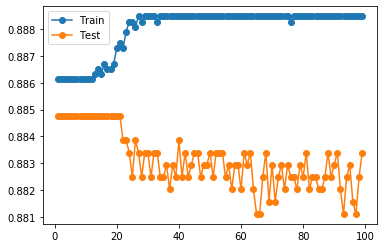

In [27]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [28]:
model.feature_importances_

array([0.02219057, 0.02310449, 0.03411944, 0.01950614, 0.00477335,
       0.00479339, 0.02385628, 0.09084628, 0.02772242, 0.01823616,
       0.01152368, 0.00020413, 0.03608593, 0.01664151, 0.0320629 ,
       0.02506275, 0.00933074, 0.01142175, 0.02322255, 0.01425494,
       0.01848332, 0.01306843, 0.03951796, 0.0321783 , 0.02673976,
       0.0247809 , 0.02884833, 0.04121144, 0.03418508, 0.00762304,
       0.02627298, 0.03667624, 0.03987936, 0.01070869, 0.01760005,
       0.01290902, 0.01840308, 0.00992046, 0.03066488, 0.02544407,
       0.00730935, 0.01020159, 0.03841425])

In [29]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,12,15,17],
    'max_features': [5], #For classification a good default is: m = sqrtp
    'n_estimators': [100,300,500], 
    'criterion': ['gini', 'entropy']
}

In [30]:
model_sel = GridSearchCV(model,param_grid)

In [31]:
model_sel.fit(X_train, np.ravel(y_train))

GridSearchCV(estimator=RandomForestClassifier(max_depth=99),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 17], 'max_features': [5],
                         'n_estimators': [100, 300, 500]})

In [32]:
model_sel.best_estimator_.score(X_test, y_test)

0.8847736625514403

In [33]:
model_sel.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 5,
 'n_estimators': 100}

In [34]:
y_pred = model_sel.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1935
           1       0.00      0.00      0.00       252

    accuracy                           0.88      2187
   macro avg       0.44      0.50      0.47      2187
weighted avg       0.78      0.88      0.83      2187



C:\Users\Álvaro\anaconda3.1\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
df2["categorySlug"].value_counts()

hosteleria-y-restauracion            1574
construccion-y-reformas              1279
negocio-inmobiliario                 1089
deportes-y-ocio                       642
peluquerias-y-centros-estetica        584
alimentacion-y-dietetica              396
confecciones-y-textiles               370
servicios-generales                   331
arte-y-entretenimiento                326
rc-tecnicas-y-profesionales           246
varios                                239
servicios-sanitarios                  194
muebles-decoracion-y-menaje-hogar     138
educacion                             127
electronica-y-maquinaria              105
profesionales-economia                 71
transporte-y-almacenamiento            63
automocion                             50
profesionales-oficina                  27
calzado-marroqueria-y-piel             26
fabricacion                             2
Name: categorySlug, dtype: int64

In [37]:
df2["region"].value_counts()

Madrid                 1758
Catalonia              1739
Andalusia              1194
Valencian_Community     747
Basque_Country          255
Galicia                 243
Balearic_Islands        231
Canary_Islands          227
Castile_and_Leon        198
Castile-La_Mancha       169
Aragon                  118
Asturias                107
Community_of_Madrid      80
Murcia                   65
Navarre                  59
Cantabria                56
Extremadura              52
Region_of_Murcia         47
La_Rioja                 25
Ceuta                     8
Name: region, dtype: int64

In [38]:
remove_words = ["England","Bogota","Bavaria","North_Rhine-Westphalia","Porto_District","Santiago_Metropolitan_Region","Morelos","Melilla","Scotland","Andorra_la_Vella","Zulia","Prague","Lombardy","Hessen","New_York","Capital_District","North_Holland","Occitania","Azuay","Cartago_Province","Utrecht","New_Hampshire","Pays_de_la_Loire","Georgia","Santa_Fe_Province","Buenos_Aires","Rio_Grande","Vienna"]

In [39]:
df2

,categorySlug,region,RC,Comercio,sale
0,muebles-decoracion-y-menaje-hogar,Catalonia,1.0,0.0,0
1,servicios-generales,Balearic_Islands,1.0,0.0,0
2,arte-y-entretenimiento,Catalonia,1.0,0.0,0
3,servicios-generales,Madrid,1.0,0.0,0
4,construccion-y-reformas,Galicia,1.0,0.0,0
...,...,...,...,...,...
8057,deportes-y-ocio,Valencian_Community,1.0,0.0,0
8058,deportes-y-ocio,Andalusia,1.0,0.0,0
8059,deportes-y-ocio,Madrid,1.0,0.0,0
8060,deportes-y-ocio,Navarre,1.0,0.0,0


In [40]:
df["region"].value_counts()

Madrid                 1758
Catalonia              1739
Andalusia              1194
Valencian_Community     747
Basque_Country          255
Galicia                 243
Balearic_Islands        231
Canary_Islands          227
Castile_and_Leon        198
Castile-La_Mancha       169
Aragon                  118
Asturias                107
Community_of_Madrid      80
Murcia                   65
Navarre                  59
Cantabria                56
Extremadura              52
Region_of_Murcia         47
La_Rioja                 25
Ceuta                     8
Name: region, dtype: int64

In [41]:
df["sale"].value_counts()

0    7075
1     902
Name: sale, dtype: int64

# SMOTETomek method

In [42]:
from imblearn.combine import SMOTEENN 
from imblearn.combine import SMOTETomek

In [43]:
oversamp_undersamp = SMOTETomek(sampling_strategy=0.6) #default sampling strategy

X_b, y_b = oversamp_undersamp.fit_sample(X, y)

X_b.shape, y_b.shape

y_b.value_counts()

0    6456
1    3873
Name: sale, dtype: int64

# SMOTE NN method


In [44]:
sme = SMOTEENN()

X_res, y_res = sme.fit_resample(X, y)
X_res.shape, y_res.shape

y_res.value_counts()

0    3469
1    1331
Name: sale, dtype: int64

# Applying SMOTETomek to our DataSets

In [45]:
X=df3

X = df3.drop(columns='sale')
y = X['sale']

oversamp_undersamp = SMOTETomek(sampling_strategy=0.6) #default sampling strategy

X_0_oh, y_0_oh = oversamp_undersamp.fit_sample(X, y)

KeyError: 'sale'

In [ ]:
X_0_oh.to_csv('data/2.Balancing/X_0_out_maxmin.csv', index=False)
y_0_oh.to_csv('data/2.Balancing/y_0_out_maxmin.csv', index=False)

In [ ]:
df2.describe()

In [ ]:
X

In [47]:
df["source"].value_counts()

adwords                    3794
facebook                    237
bing                        197
hubspot                      61
hs_automation                14
GoogleDisplay                10
trustpilot                    1
SingularC.email.billage       1
Name: source, dtype: int64

In [51]:
df5 = df[['categorySlug', 'region', 'RC', 'Comercio', 'sale',"source"]]
df5

,categorySlug,region,RC,Comercio,sale,source
0,muebles-decoracion-y-menaje-hogar,Catalonia,1.0,0.0,0,NaN
1,servicios-generales,Balearic_Islands,1.0,0.0,0,adwords
2,arte-y-entretenimiento,Catalonia,1.0,0.0,0,adwords
3,servicios-generales,Madrid,1.0,0.0,0,adwords
4,construccion-y-reformas,Galicia,1.0,0.0,0,adwords
...,...,...,...,...,...,...
8057,deportes-y-ocio,Valencian_Community,1.0,0.0,0,NaN
8058,deportes-y-ocio,Andalusia,1.0,0.0,0,NaN
8059,deportes-y-ocio,Madrid,1.0,0.0,0,NaN
8060,deportes-y-ocio,Navarre,1.0,0.0,0,hs_automation


In [52]:
categorical_list = ["categorySlug","region","source"]
X = df5.drop(columns='sale')
X = get_dummies(X, categorical_list)
y = df5['sale']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [56]:
df5=df5.dropna()
df5

,categorySlug,region,RC,Comercio,sale,source
1,servicios-generales,Balearic_Islands,1.0,0.0,0,adwords
2,arte-y-entretenimiento,Catalonia,1.0,0.0,0,adwords
3,servicios-generales,Madrid,1.0,0.0,0,adwords
4,construccion-y-reformas,Galicia,1.0,0.0,0,adwords
5,construccion-y-reformas,Catalonia,1.0,0.0,0,adwords
...,...,...,...,...,...,...
8052,deportes-y-ocio,Andalusia,1.0,0.0,0,hubspot
8054,deportes-y-ocio,Catalonia,1.0,0.0,0,adwords
8055,deportes-y-ocio,Andalusia,1.0,0.0,0,adwords
8060,deportes-y-ocio,Navarre,1.0,0.0,0,hs_automation


In [54]:
oversamp_undersamp = SMOTETomek(sampling_strategy=0.6) #default sampling strategy
X_train_b, y_train_b = oversamp_undersamp.fit_sample(X_train, y_train)
X_train_b.shape, y_train_b.shape
y_train_b.value_counts()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').